In [ ]:
# 2.4 重要接口inverse_transform

In [ ]:
    # 2.4.1 迷你案例：用人脸识别看PCA降维后的信息保存量

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. 导入数据，探索数据(与2.3.3节中步骤一致)
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#怎样理解这个数据的维度？
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

In [3]:
# 3. 建模降维，获取降维后的特征矩阵X_dr
pca = PCA(150) #实例化
X_dr = pca.fit_transform(X) #及拟合由提取结果
X_dr.shape

(368, 150)

In [5]:
# 4. 将降维后矩阵用inverse_transform返回原空间
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(368, 2914)

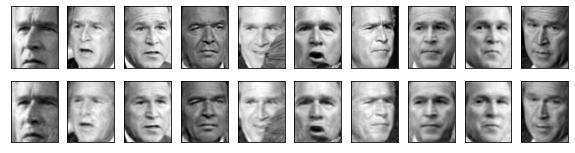

In [8]:
# 5. 将特征矩阵X和X_inverse可视化
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                    ,subplot_kw={"xticks":[],"yticks":[]}
                    )
#和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

In [ ]:
# 降维是不可逆的

In [ ]:
    # 2.4.2 迷你案例：用PCA做噪音过滤

In [10]:
# 1. 导入所需要的库和模块
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 2. 导入数据，探索数据
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
digits.images.shape

(1797, 8, 8)

In [14]:
set(digits.target.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
# 3. 定义画图函数
def plot_digits(data):
    #data的结构必须是(m,n), 并且n要能够被分成(8, 8)这样的结构
    fig, axes = plt.subplots(4,10, figsize = (10, 4)
                            ,subplot_kw={"xticks":[], "yticks":[]}
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap = "binary")

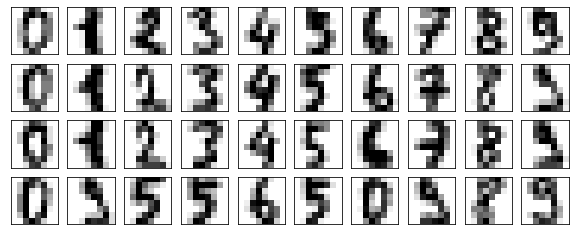

In [17]:
plot_digits(digits.data)

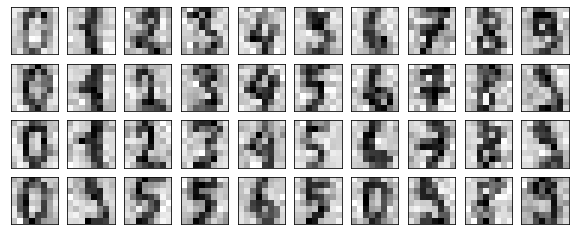

In [23]:
# 4. 为数据加上噪音
rng = np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [24]:
# 5. 降维
pca = PCA(0.5).fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

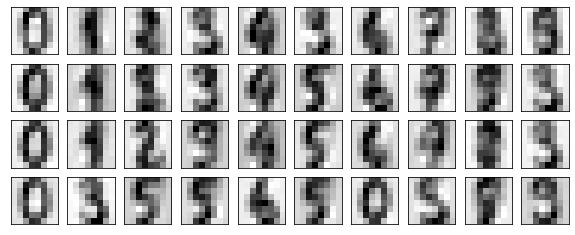

In [25]:
# 6. 逆转降维结果，实现降噪
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)